## Study the Hubbard atom with TRIQS (Compare with results from Ex_02)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from triqs.gf import *
from triqs.operators import *
from triqs.atom_diag import *

In [2]:
fops=[('up', 0), ('dn', 0)]
# fops is a list of the "fundamental operators" of the problem. 
# Think of them as the indices of the creation and annihilation operators in your system
# In the Hubbard atom, the electrons have a spin index which can take values 'up'or 'down'.
# The zero doesn't play a role in the Hubbard atom, but is needed for syntactic reasons. Ignore it for now.

def hamiltonian(U, mu):
    # Input: float U (interaction strength), float mu (chemical potential)
    # Output: The Hamiltonian in second quantized form

    # Return the Hamiltonian of the Hubbard atom in second-quantized form
    return -mu*n('up', 0) - mu*n('dn', 0) + U*n('up', 0)*n('dn', 0)           # The symbol n is defined in the module triqs.operators to be the number operator. n(fop) = c_dag(fop)*c(fop)
                                                                              # Notice that that arguments of n are consistent with the items in the list fops

# Observables can be defined in the form of second quantized operators 
N = n('up', 0)+n('dn', 0)    # The total number operator
m = n('up', 0)-n('dn', 0)    # The magnetization
msq = (m*m)                  # The squared magnetization

Text(0.5, 1.0, 'U=4.0, beta=1/2')

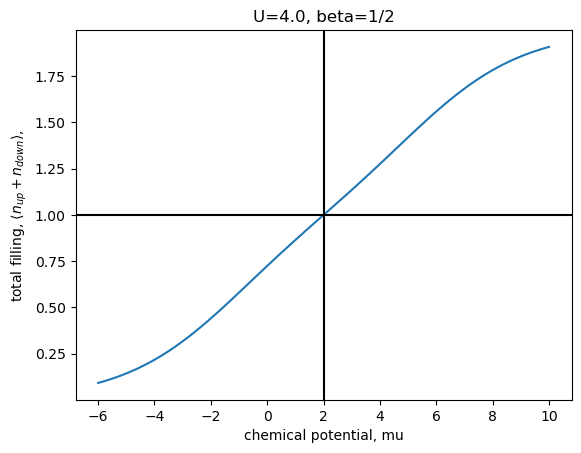

In [3]:
U=4.0
beta=1/2

mus = np.linspace(-3/2*U, 5/2*U, 100)
Ns_expectation = []

for mu in mus:
    ad = AtomDiag(hamiltonian(U, mu), fops)          # The AtomDiag class from triqs.atom_diag contains a lot of useful 
                                                     # pre-defined methods to calculate typical many-body physics quantities

    dm = atomic_density_matrix(ad, beta)             # the function atomic_density_matrix from triqs.atom_diag calculates the density matrix 
                                                     # of the given AtomDiag object at the inverse temperature beta
    
    N_expectation = trace_rho_op(dm, N, ad)          # the function trace_rho_op from triqs.atom_diag, calculates the trace of 
                                                     # the product of the density matrix in the first argument and the second-quantized operator
                                                     # in the second argument, for the system defined by the AtomDiag object in the third argument
    
    Ns_expectation.append(N_expectation)
    
plt.plot(mus, Ns_expectation)
plt.axvline(U/2, color='k')
plt.axhline(1, color='k')
plt.xlabel('chemical potential, mu')
plt.ylabel('total filling, $\\langle n_{up} + n_{down}\\rangle$,')
plt.title('U=4.0, beta=1/2')

Text(0.5, 1.0, 'U=4.0, mu=U/2 (half-filling)')

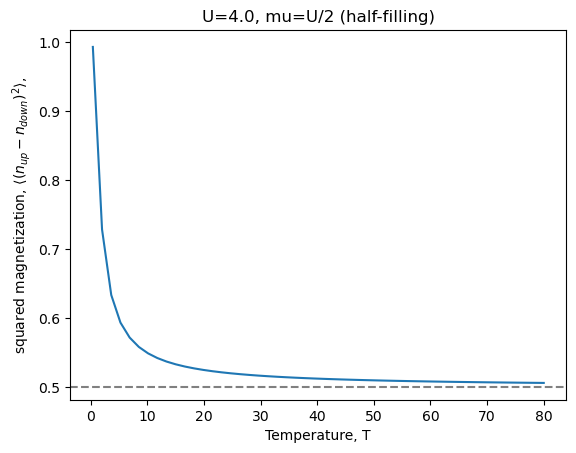

In [4]:
U=4.0
mu=U/2
ad = AtomDiag(hamiltonian(U, mu), fops)     

Ts = np.linspace(0.1*U, 20*U)
betas = 1/Ts
msqs_expectation = []

for beta in betas:
    dm = atomic_density_matrix(ad, beta)            
    msq_expectation = trace_rho_op(dm, msq, ad)     
    msqs_expectation.append(msq_expectation)
    
plt.plot(Ts, msqs_expectation)
plt.xlabel('Temperature, T')
plt.ylabel('squared magnetization, $\\langle(n_{up} - n_{down})^2\\rangle$,')
plt.axhline(0.5, color = 'gray', linestyle='dashed')
plt.title('U=4.0, mu=U/2 (half-filling)')

## Study the Hubbard dimer with TRIQS

In [71]:
fops=[('up', 1), ('dn', 1), ('up', 2), ('dn', 2)]
# Here, the integer in fop plays the role of a site index.

Ntot = n('up', 1) + n('dn', 1) + n('up', 2) + n('dn', 2)        # The total number operator
m1 = n('up', 1)-n('dn', 1)                                      # The magnetization at site 1
m2 = n('up', 2)-n('dn', 2)                                      # The magnetization at site 2
m1sq = m1*m1
m2sq = m2*m2                                                   

def hamiltonian_dimer(U, mu, t):
    hamiltonian = -mu*Ntot                                                       # The chemical potential term
    hamiltonian += -t*(c_dag('up', 1)*c('dn', 2) + c_dag('up', 2)*c('dn', 1))     # The hopping term
    hamiltonian += U*n('up', 1)*n('dn', 1) + U*n('up', 2)*n('dn', 2)

    return hamiltonian

Text(0.5, 1.0, 'Low temperature, beta=10')

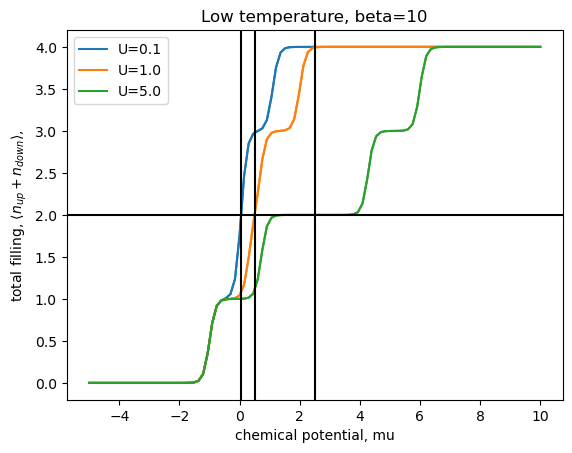

In [74]:
# Low temperature case beta*t>>1

Us=[0.1, 1, 5]
beta=10
t=1

mus = np.linspace(-5, 10, 100)
m1sqs_expectation = []
Ntots_expectation = []

counter = 0
for U in Us:
    m1sqs_expectation = []
    Ntots_expectation = []
    for mu in mus:
        ad = AtomDiag(hamiltonian_dimer(U, mu, t), fops)          
        dm = atomic_density_matrix(ad, beta)     
    
        Ntot_expectation = trace_rho_op(dm, Ntot, ad)      
        Ntots_expectation.append(Ntot_expectation)
        
        m1sq_expectation = trace_rho_op(dm, m1sq, ad)      
        m1sqs_expectation.append(m1sq_expectation)
        
    plt.plot(mus, Ntots_expectation, color='C'+str(counter), label='U={:.1f}'.format(U))
    plt.plot(mus, Ntots_expectation, color='C'+str(counter))
    counter+=1

for U in Us:
    plt.axvline(U/2, color='k')
plt.axhline(2, color='k')
plt.legend()
plt.xlabel('chemical potential, mu')
plt.ylabel('total filling, $\\langle n_{up} + n_{down}\\rangle$,')
plt.title('Low temperature, beta=10')

Text(0.5, 1.0, 'High temperature, beta=2')

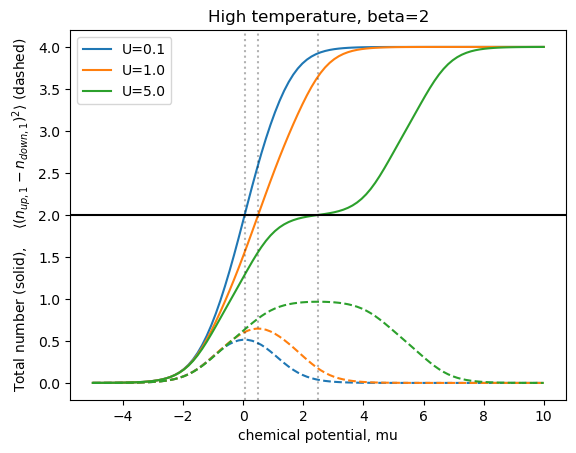

In [68]:
# High temperature case beta*t~1

Us=[0.1, 1, 5]
beta=2
t=1

mus = np.linspace(-5, 10, 100)

counter = 0
for U in Us:
    m1sqs_expectation = []
    Ntots_expectation = []
    for mu in mus:
        ad = AtomDiag(hamiltonian_dimer(U, mu, t), fops)          
        dm = atomic_density_matrix(ad, beta)     
    
        Ntot_expectation = trace_rho_op(dm, Ntot, ad)      
        Ntots_expectation.append(Ntot_expectation)
        
        m1sq_expectation = trace_rho_op(dm, m1sq, ad)      
        m1sqs_expectation.append(m1sq_expectation)
        
    plt.plot(mus, Ntots_expectation, color='C'+str(counter), label='U={:.1f}'.format(U))
    plt.plot(mus,m1sqs_expectation, color='C'+str(counter), linestyle='dashed')
    counter+=1

for U in Us:
    plt.axvline(U/2, color='k', alpha=0.3, linestyle='dotted')
plt.legend()
plt.axhline(2, color='k')
plt.xlabel('chemical potential, mu')
plt.ylabel('Total number (solid),    $\\langle (n_{up, 1} - n_{down, 1})^2\\rangle$ (dashed)')
plt.title('High temperature, beta=2')

Text(0.5, 1.0, 'Half-filling')

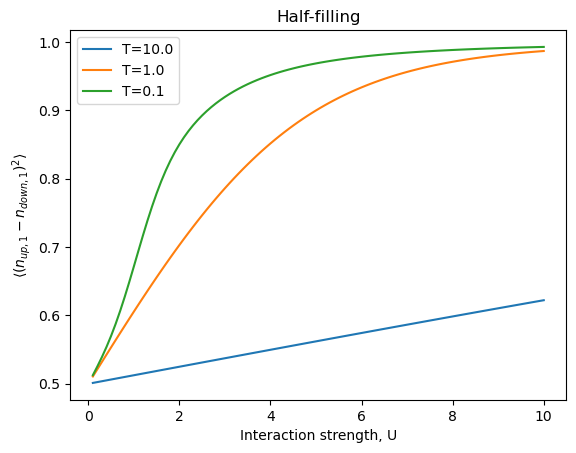

In [76]:
# High temperature case beta*t~1

betas=[0.1, 1, 10]

Us=np.linspace(0.1, 10, 100)
t=1

counter = 0
for beta in betas:
    m1sqs_expectation = []
    for U in Us:
        mu=U/2
        ad = AtomDiag(hamiltonian_dimer(U, mu, t), fops)          
        dm = atomic_density_matrix(ad, beta)     
        
        m1sq_expectation = trace_rho_op(dm, m1sq, ad)      
        m1sqs_expectation.append(m1sq_expectation)
        
    plt.plot(Us, m1sqs_expectation, color='C'+str(counter), label='T={:.1f}'.format(1/beta))
    counter+=1

plt.legend()
plt.xlabel('Interaction strength, U')
plt.ylabel('$\\langle (n_{up, 1} - n_{down, 1})^2\\rangle$')
plt.title('Half-filling')